In [148]:
import pandas as pd
from scipy import stats
import os
import matplotlib.pyplot as plt

In [160]:
def store_results(results_file, provider, const, model_a, model_b, t_test):    
    output = f'{provider},{const},{model_a},{model_b},{t_test}'
    if not os.path.exists(results_file):
        with open(results_file, 'a') as output_file:  # 'a' for append to end of file
            headlines = 'provider,const,model_a,model_b,t_test'
            output_file.write(headlines + "\n" + output + "\n")
    else:
        with open(results_file, 'a') as output_file:  # 'a' for append to end of file
            output_file.write(output + "\n")

In [161]:
def delete_file(results_file):
    if os.path.exists(results_file):#we it all again so no need to keep what was calc before
        os.remove(results_file)

In [162]:
#get data
df = pd.read_csv('results/all_results.csv')

In [163]:
providers_list = df['provider'].value_counts().index
providers_list

Index(['867c4a38-0d75-46ff-a4c2-f44cb63be2c9',
       'a12f6956-9aca-4550-8caa-2e2f9532674c',
       '02531004-4599-4177-9d7d-00bc85a200c6',
       '856f211d-c66e-4db7-b910-7419900a70e1'],
      dtype='object', name='provider')

In [153]:
A_type = ['dt', 'cs', 'cfn=cfp AdaCSL_WRC']
B_type = ['AdaCSL_WRC']


for b in B_type:
    mask_b = df['model_name'] == b
    b_data = data[mask_b]
    for a in A_type:
        mask_a = df['model_name'] == a
        a_data = data[mask_a]
        # t test is A>B
        print(f'model_a: {a}, model_b: {b}')
        print(stats.ttest_rel(a_data['accuracy'], b_data['accuracy'], alternative='less')[1])

model_a: dt, model_b: AdaCSL_WRC
0.9520745606593994
model_a: cs, model_b: AdaCSL_WRC
0.018176009336334446
model_a: cfn=cfp AdaCSL_WRC, model_b: AdaCSL_WRC
0.2285258239187346


C:\Users\amith\AppData\Local\Temp\ipykernel_16716\3785158794.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b_data = data[mask_b]
C:\Users\amith\AppData\Local\Temp\ipykernel_16716\3785158794.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a_data = data[mask_a]
C:\Users\amith\AppData\Local\Temp\ipykernel_16716\3785158794.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a_data = data[mask_a]
C:\Users\amith\AppData\Local\Temp\ipykernel_16716\3785158794.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a_data = data[mask_a]


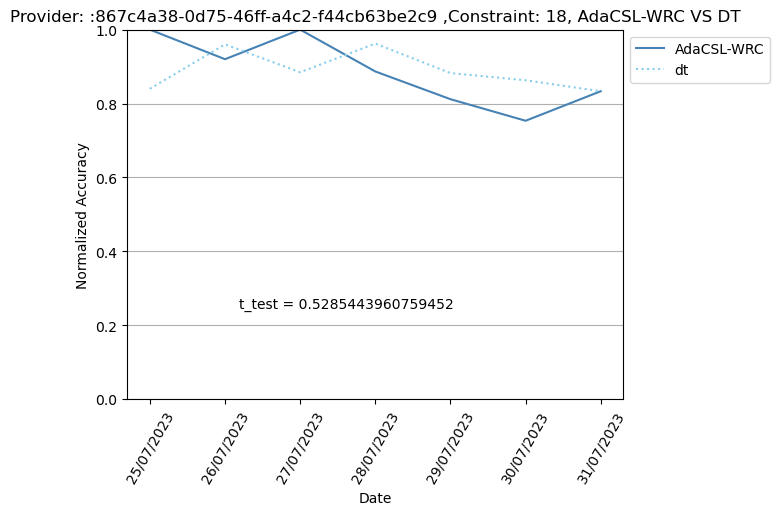

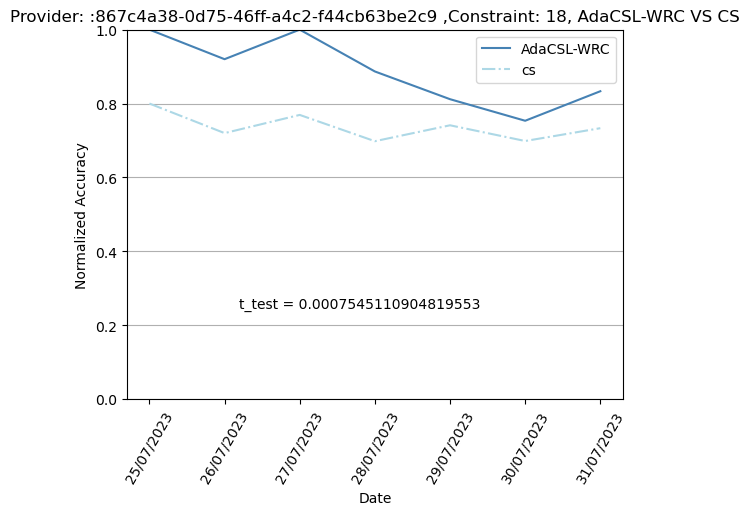

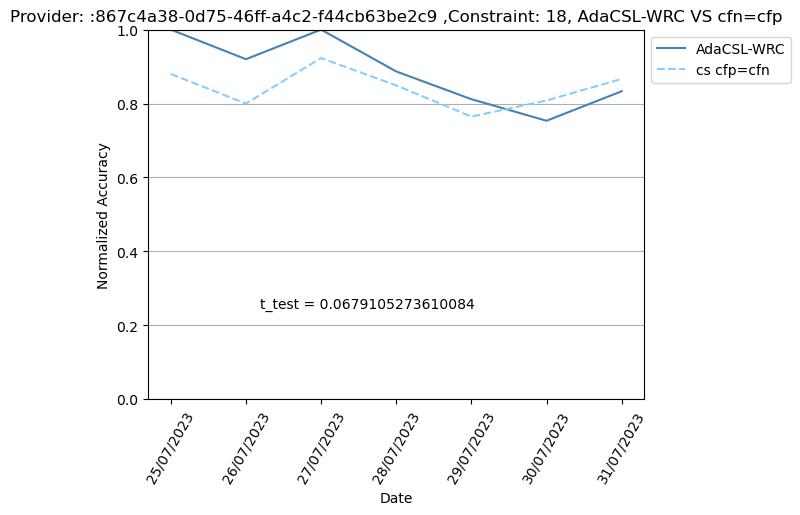

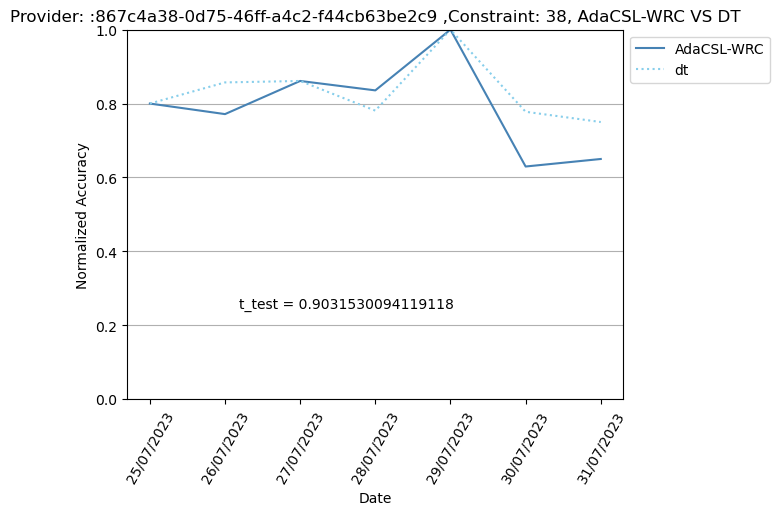

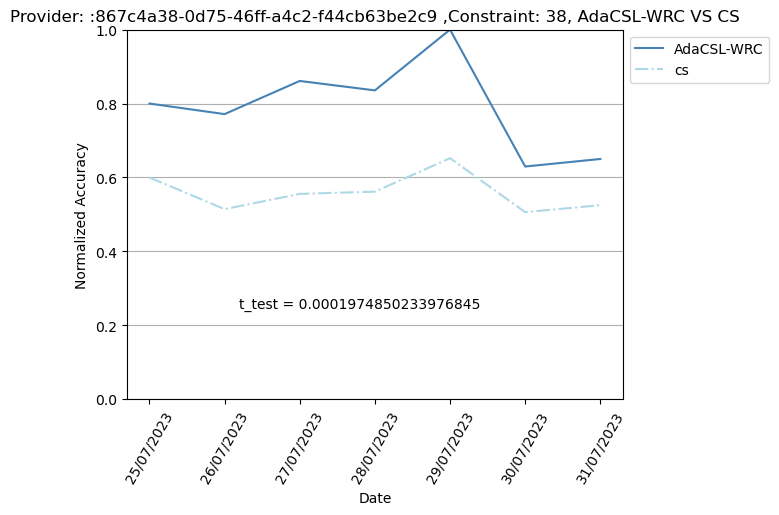

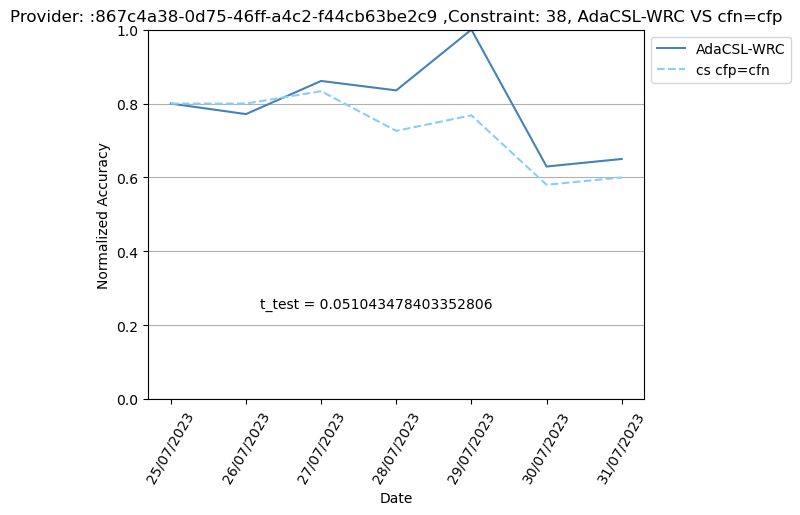

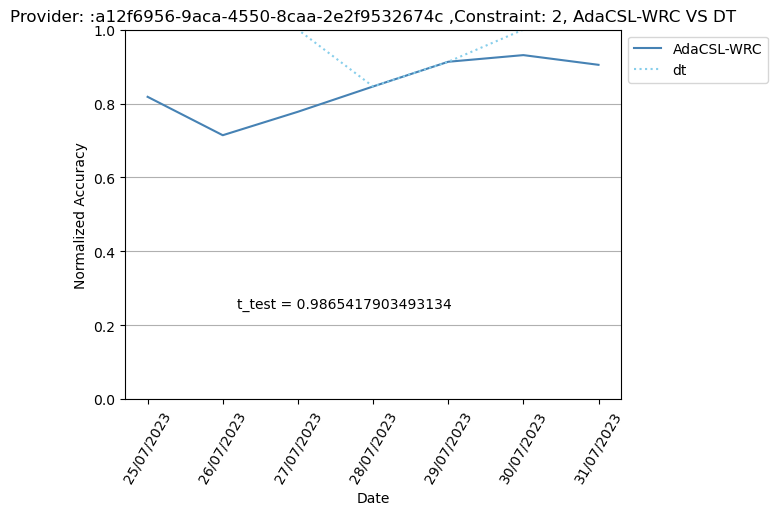

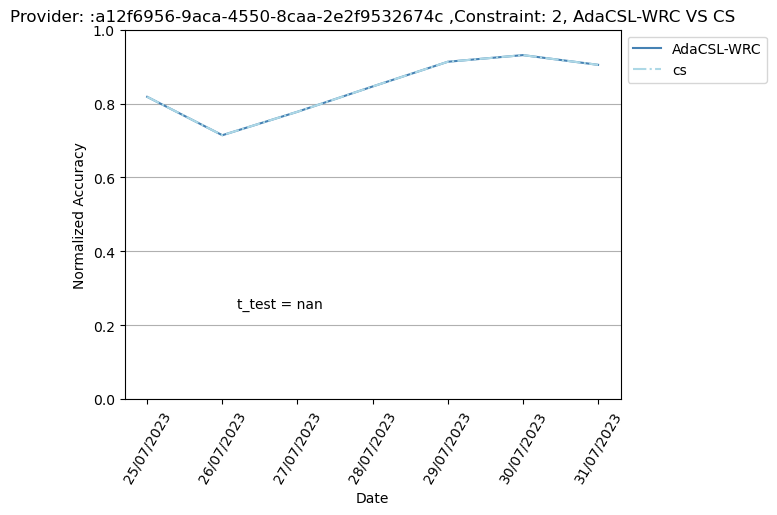

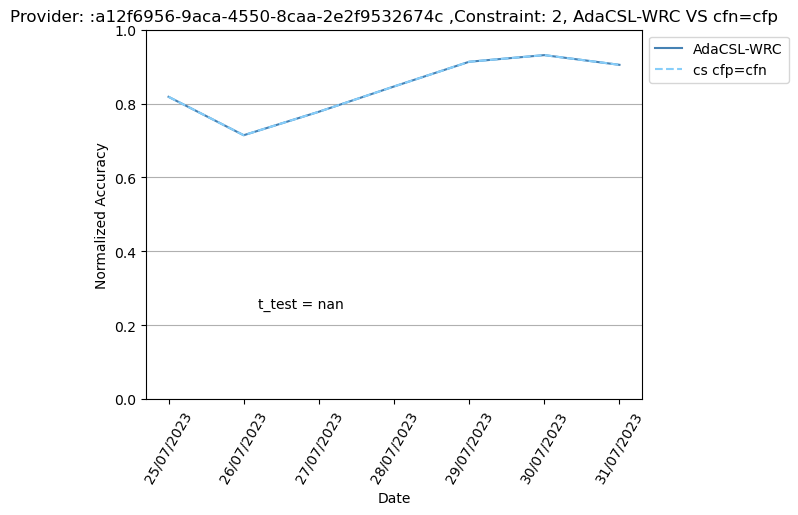

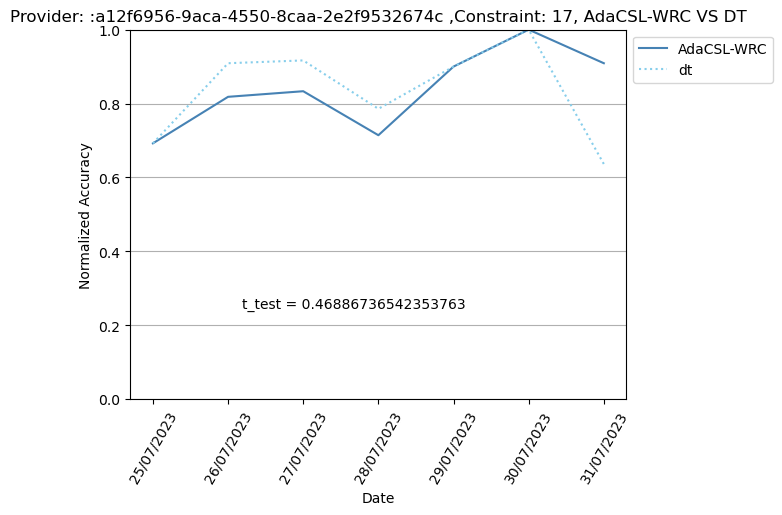

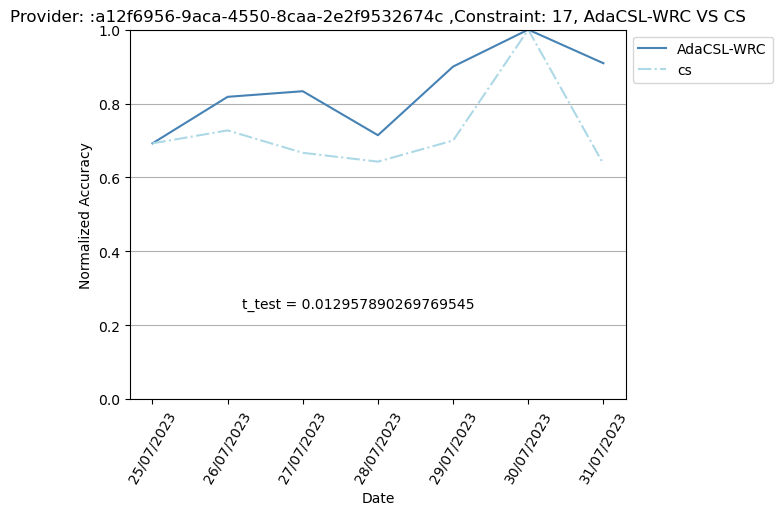

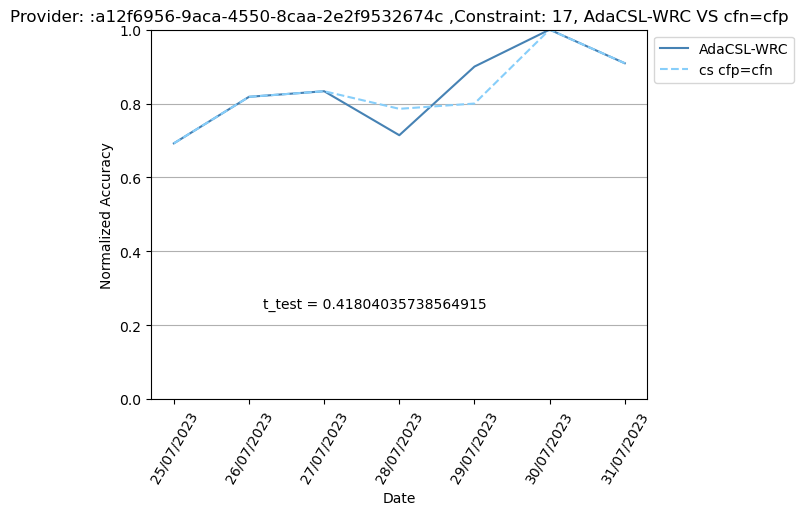

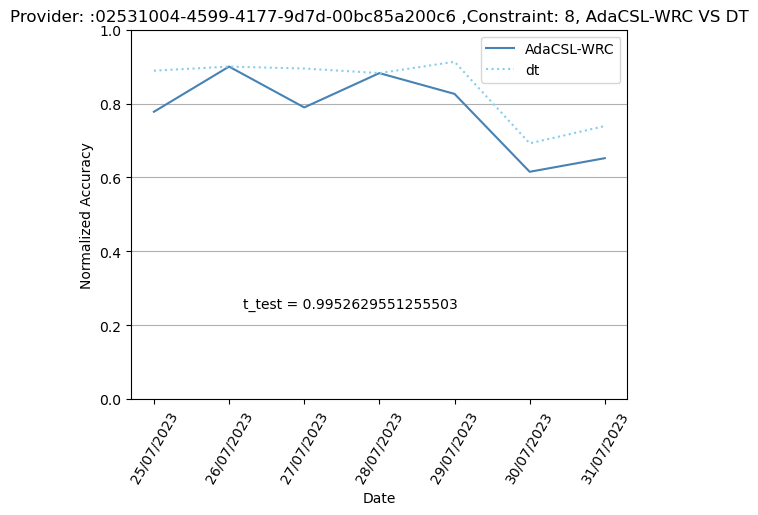

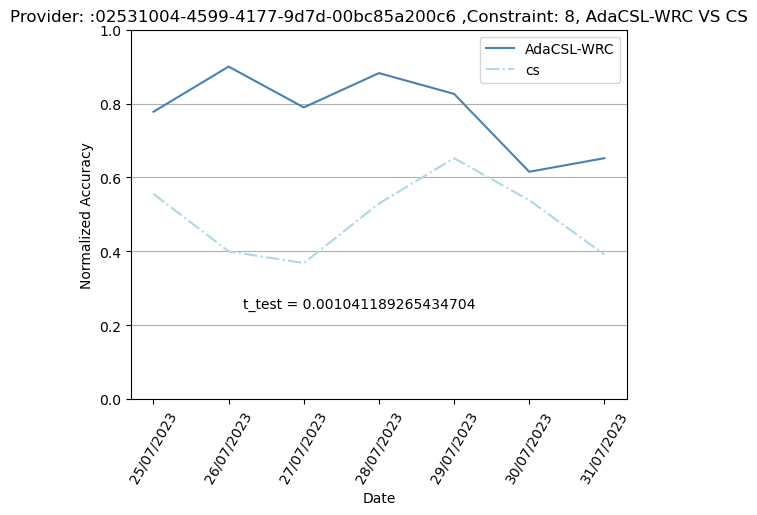

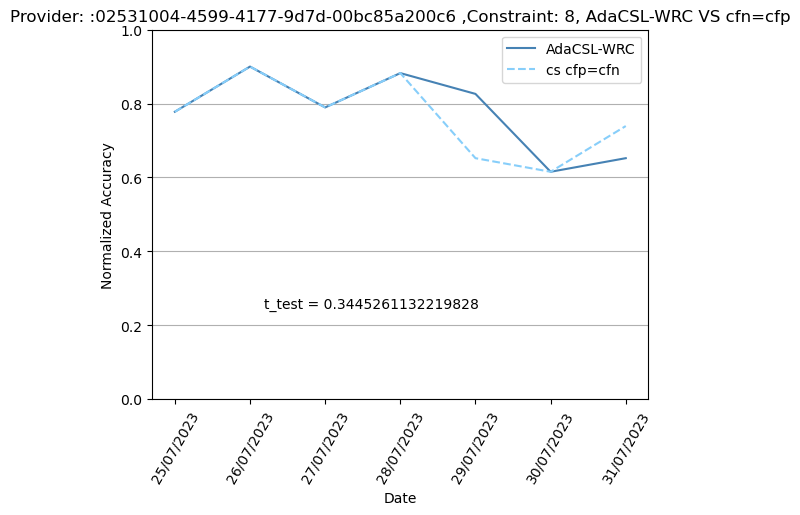

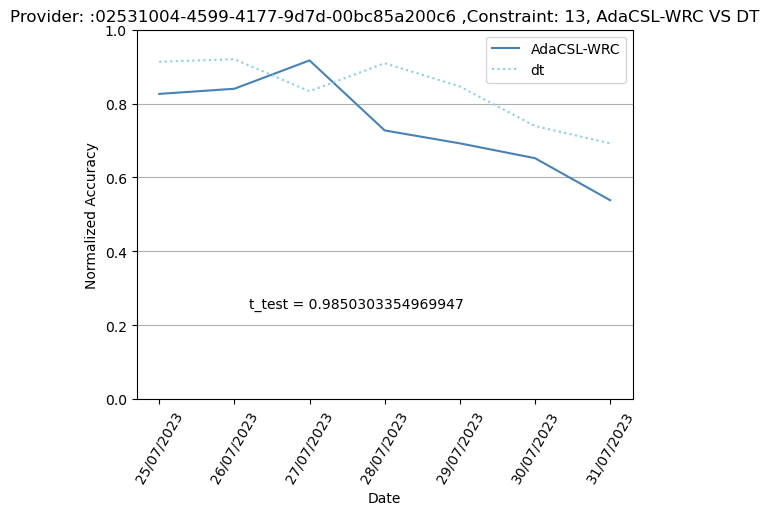

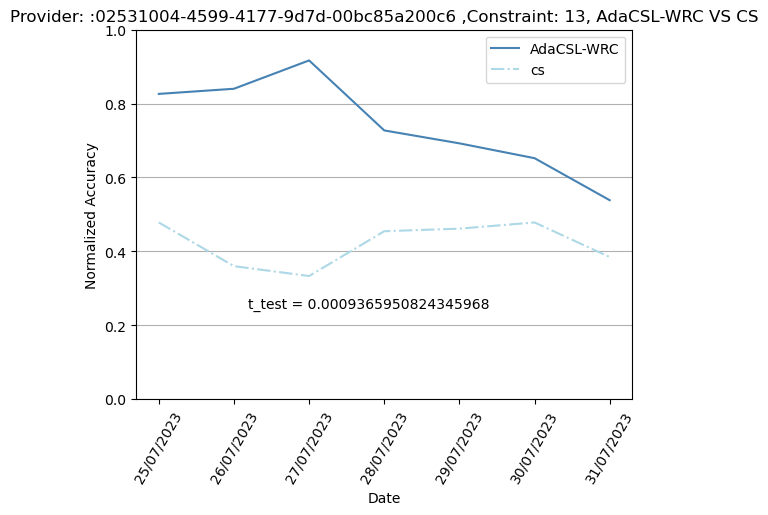

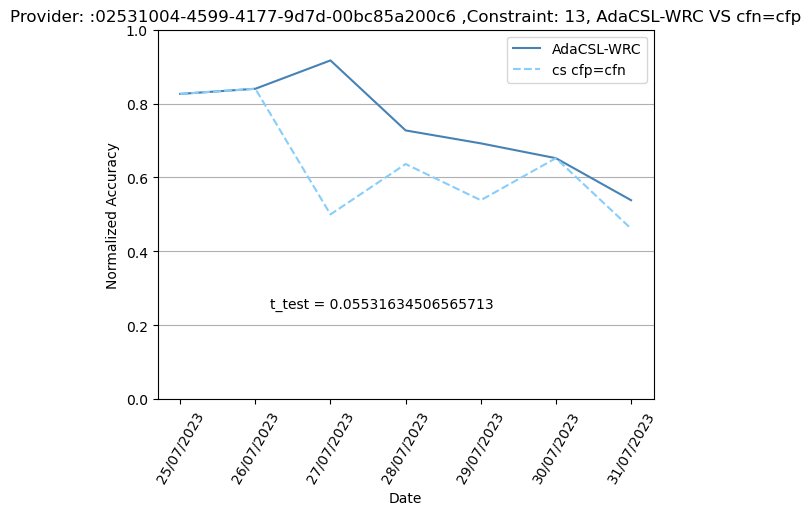

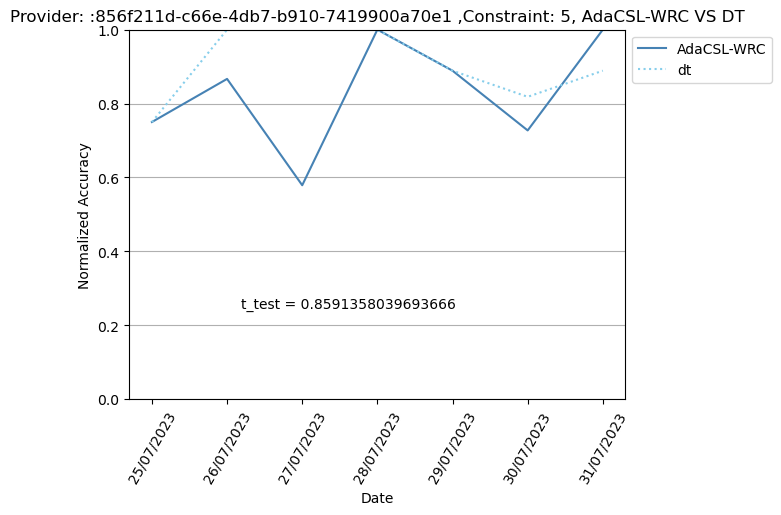

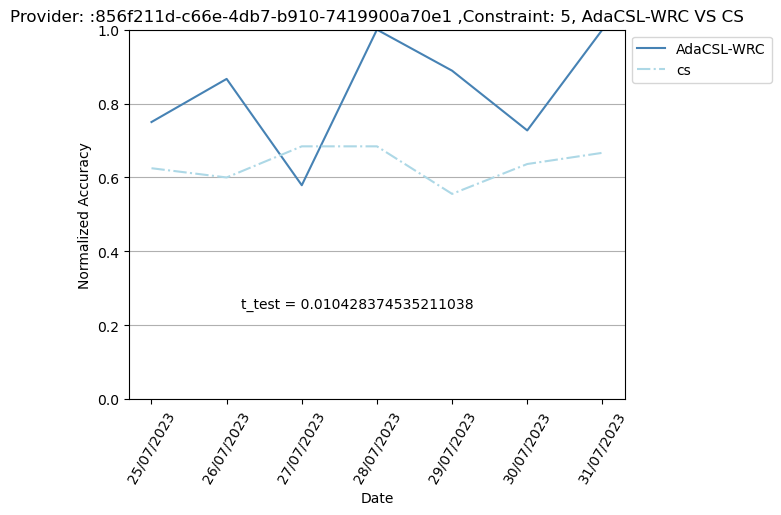

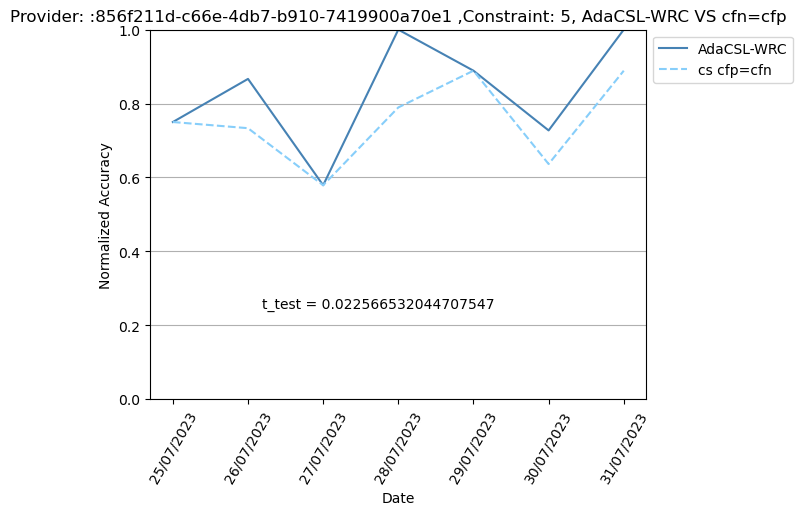

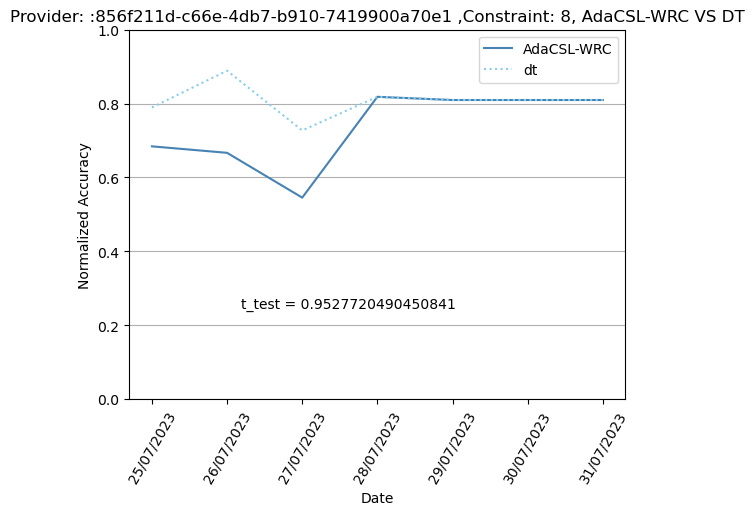

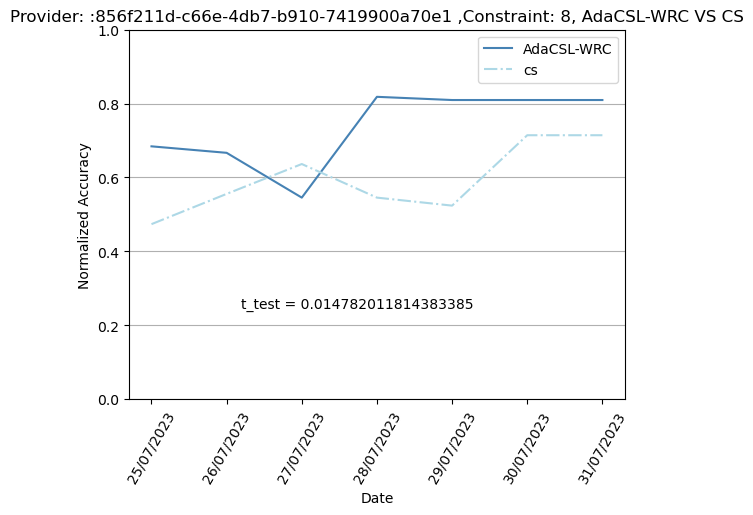

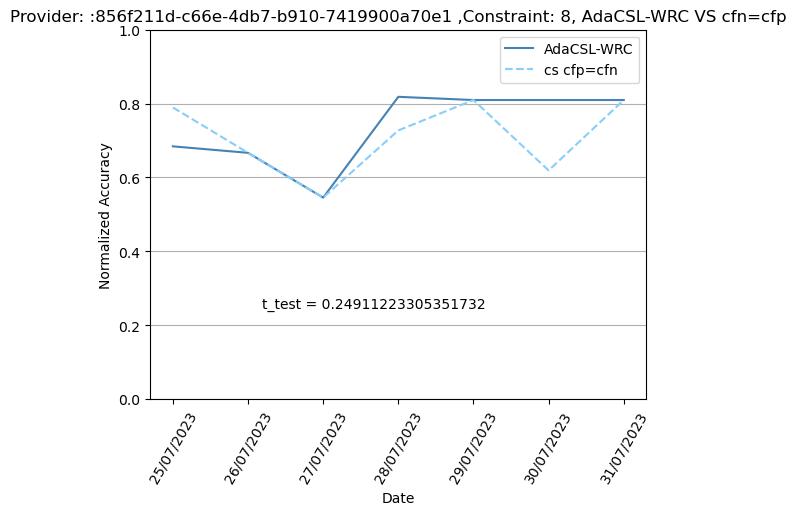

In [166]:
results_file = 'results/t_test_res.csv'
delete_file(results_file)

dates = df['date'].value_counts().index
for provider in providers_list:
    provider_mask = df['provider'] == provider
    for const in df[provider_mask]['constraint'].value_counts().index:
        constrain_mask = df['constraint'] == const
        data = df[provider_mask&constrain_mask]
        
        #get metrics data
        AdaCSL_WRC = data[data['model_name'] == 'AdaCSL_WRC']
        dt = data[data['model_name'] == 'dt'] 
        cs = data[data['model_name'] == 'cs']
        cfn_cfp = data[data['model_name'] == 'cfn=cfp AdaCSL_WRC']
        
        #calc noramlize data
        ada_acc = AdaCSL_WRC['accuracy']/AdaCSL_WRC['max_accuracy']
        dt_acc = dt['accuracy']/dt['max_accuracy']
        cs_acc = cs['accuracy']/cs['max_accuracy']
        cfn_cfp_acc = cfn_cfp['accuracy']/cfn_cfp['max_accuracy']
        
        # AdaCSL_WRC VS DT
        plt.title(f'Provider: :{provider} ,Constraint: {const}, AdaCSL-WRC VS DT')
        plt.plot(dates, ada_acc, label='AdaCSL-WRC',color = 'steelblue')
        plt.plot(dates, dt_acc,linestyle= 'dotted',label='dt',color = 'skyblue')
        t_test = stats.ttest_rel(dt_acc, ada_acc, alternative="less")[1]
        store_results(results_file, provider, const, 'dt', 'AdaCSL-WRC', t_test) #store T_test results
        plt.figtext(.3, .3, f't_test = {t_test}')
        plt.xlabel('Date')
        plt.xticks(rotation=60)
        plt.ylabel('Normalized Accuracy')
        plt.grid(axis='y')
        plt.ylim([0, 1])
        plt.legend(bbox_to_anchor=(1, 1))
        plt.show()
        
        # AdaCSL_WRC VS CS
        plt.title(f'Provider: :{provider} ,Constraint: {const}, AdaCSL-WRC VS CS')
        plt.plot(dates, ada_acc, label='AdaCSL-WRC',color = 'steelblue')
        plt.plot(dates, cs_acc, linestyle= 'dashdot', label='cs',color = 'lightblue')
        t_test = stats.ttest_rel(cs_acc, ada_acc, alternative="less")[1]
        store_results(results_file, provider, const, 'cs', 'AdaCSL-WRC', t_test) #store T_test results
        plt.figtext(.3, .3, f't_test = {t_test}')
        plt.xlabel('Date')
        plt.xticks(rotation=60)
        plt.ylabel('Normalized Accuracy')
        plt.grid(axis='y')
        plt.ylim([0, 1])
        plt.legend(bbox_to_anchor=(1, 1))
        plt.show()
        
        # AdaCSL_WRC VS cfn=cfp 
        plt.title(f'Provider: :{provider} ,Constraint: {const}, AdaCSL-WRC VS cfn=cfp')
        plt.plot(dates, ada_acc, label='AdaCSL-WRC',color = 'steelblue')
        plt.plot(dates, cfn_cfp_acc, linestyle='dashed', label='cs cfp=cfn',color = 'lightskyblue')
        t_test = stats.ttest_rel(cfn_cfp_acc, ada_acc, alternative="less")[1]
        store_results(results_file, provider, const, 'cfn=cfp AdaCSL_WRC', 'AdaCSL-WRC', t_test) #store T_test results
        plt.figtext(.3, .3, f't_test = {t_test}')
        plt.xlabel('Date')
        plt.xticks(rotation=60)
        plt.ylabel('Normalized Accuracy')
        plt.grid(axis='y')
        plt.ylim([0, 1])
        plt.legend(bbox_to_anchor=(1, 1))
        plt.show()

